In [0]:
import random
import math

num_city = 100
num_air = 3
cities = set()
airports = []
air1Cities=[]
air2Cities=[]
air3Cities=[]
for i in range(num_city):
    x = random.random()
    y = random.random()
    cities.add((x,y))
    
for i in range(num_air):
    x = random.random()
    y = random.random()
    airports.append((x,y))

[(0.9102204567214024, 0.5835762629364734), (0.23678020800201804, 0.44612831231367645), (0.9324502391414738, 0.17682197431595503)]


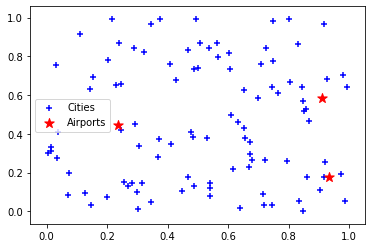

In [0]:
import matplotlib.pyplot as plt

zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt
print(airports)

In [0]:

import math
import numpy as np
#this list will hold values in form of ( int, (float,float))
#fist value represents the airport that is closest to a given city
#second value is tuple of city coordinates in form of  (x, y)
airListPlusCities = []

#this function calculates the linear distance of two coordinates
def distanceOfTwoPoints(xa, ya, xc, yc):
  return math.sqrt(((xa - xc)**2) + ((ya - yc)**2))
  ''' iterate through each city in cities tuple and 
  calculate the distance from 3 airpors to each city, 
  find the closest airport and add (airport#, (xcity, ycity)) into list'''

def setAirPortForCities ():
  (x1, y1) = airports[0]
  (x2, y2) = airports[1]
  (x3, y3) = airports[2]
  for city in cities:
    (xc,yc) = city
    distanceFromA1 = distanceOfTwoPoints(x1, y1, xc, yc)
    distanceFromA2 = distanceOfTwoPoints(x2, y2, xc, yc)
    distanceFromA3 = distanceOfTwoPoints(x3, y3, xc, yc)
    
    minD = np.argmin([distanceFromA1, distanceFromA2, distanceFromA3])
    kac = (minD , city)
    airListPlusCities.append(kac)
   


setAirPortForCities()
list.sort(airListPlusCities)
for i in range (3):
  # for i in range (len(airListPlusCities)):
  print(airListPlusCities[i])

  
print(airports)
type(airports)
# type(airListPlusCities[0])
# print(airListPlusCities[0][1][0])

(0, (0.49485277088074053, 0.9915157614758202))
(0, (0.5066218699732778, 0.8669130767878183))
(0, (0.5368677437915162, 0.8440316465295512))
[(0.9102204567214024, 0.5835762629364734), (0.23678020800201804, 0.44612831231367645), (0.9324502391414738, 0.17682197431595503)]


list

In [0]:
x_sum_list = []
y_sum_list = []
x_sum = 0
y_sum = 0

for i in range (len(airListPlusCities)):

  #print(airListPlusCities[i])
  #print(airListPlusCities[i][0])
  
  
  
  if(airListPlusCities[i][0]) == 0:
    x_sum += airListPlusCities[i][1][0]
    y_sum += airListPlusCities[i][1][1]
    print(x_sum, " ",y_sum)

print("\n")
print(x_sum)
print(y_sum)



In [0]:



def g_func(airports):

  x1, y1 = airports[0]
  x2, y2 = airports[1]
  x3, y3 = airports[2]
  x1_sum,y1_sum,x2_sum,y2_sum,x3_sum,y3_sum = 0,0,0,0,0,0

  for i in range(len(airListPlusCities)):
    xc,yc = airListPlusCities[i][1][0], airListPlusCities[i][1][1]
    
    if(airListPlusCities[i][0]) == 0:
      x1_sum += (2 * (x1 - xc))
      y1_sum += (2 * (y1 - yc))

    if(airListPlusCities[i][0]) == 1:
       x2_sum += (2 * (x2 - xc))
       y2_sum += (2 * (y2 - yc))

    if(airListPlusCities[i][0]) == 1:
      x3_sum += (2 * (x3 - xc))
      y3_sum += (2 * (y3 - yc))



    #     if(airListPlusCities[i][0]) == 0:
    airports[0][0] = x1_sum
    airports[0][1] = y1_sum

    # if(airListPlusCities[i][0]) == 1:
    airports[1][0] = x2_sum
    airports[1][1] = y2_sum

    # if(airListPlusCities[i][0]) == 1:
    airports[2][0] = x3_sum
    airports[2][1] = y3_sum
      
  return airports

 
print(g_func(airports))







TypeError: ignored

The objective function is given by $f(x_1,y_1,x_2,y_2,x_3,y_3)=\sum_{i=1}^n\sum_{c\in C_i}(x_i-x_c)^2+(y_i-y_c)^2$ where $n$ is the number of the airports and $C_i$ is the set of cities whose closest airport is airport $i$. The goal of the program is determining the locations of airports that minimize the objective function using gradient based optimizatoin. 

The gradient of the objective function is $\nabla f(x_1,y_1,x_2,y_2,x_3,y_3)=\big(2\sum_{c\in C_1}(x_1-x_c),2\sum_{c\in C_1}(y_1-y_c),2\sum_{c\in C_2}(x_2-x_c),2\sum_{c\in C_2}(y_2-y_c),2\sum_{c\in C_3}(x_3-x_c),2\sum_{c\in C_3}(y_3-y_c)\big)$

By updating $(x_1,y_1,x_2,y_2,x_3,y_3)\gets (x_1,y_1,x_2,y_2,x_3,y_3)-\alpha \nabla f(x_1,y_1,x_2,y_2,x_3,y_3)$ where $0<\alpha\ll1$ is a constant, **find the optimal locations of the airports $(x_1,y_1,x_2,y_2,x_3,y_3)$.**

Every time the locations of the airports are updated, **plot the objective value as shown in the figure**.

<Note: The objective values may be different than the example.>
<img src="airports_loss.png" style="width:400px">